## Исследование интернет-магазина компьютерных игр "Стримчик"

В нашем распоряжении данные интернет-магазина компьютерных игр "Стримчик" -данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Описание данных:**
- **Name** — название игры;
- **Platform** — платформа;
- **Year_of_Release** — год выпуска;
- **Genre** — жанр игры;
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий);
- **EU_sales** — продажи в Европе (миллионы проданных копий);
- **JP_sales** — продажи в Японии (миллионы проданных копий);
- **Other_sales** — продажи в других странах (миллионы проданных копий);
- **Critic_Score** — оценка критиков (максимум 100);
- **User_Score** — оценка пользователей (максимум 10);
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
*Данные за 2016 год могут быть неполными.*

**Цель исследования:**
1. Анализ данных:
   * Количество выпущенных игр в разные годы;
   * Изменение продаж по платформам;
   * Анализ данных за актуальный период;
   * Выбор потенциально прибыльных платформ;
   * Построение графиков по глобальным продажам игр на разные платформы;
   * Влияние отзывов пользователей и критиков на продажи на популярной платформе;
   * Общее распределение игр по жанрам.
2. Составление портрета пользователя по разным регионам(NA, EU, JP) и определение для каждого портрета:
   * Самые популярные платформы (топ-5);
   * Самые популярные жанры (топ-5);
   * Влияние рейтинга ESRB на продажи в отдельном регионе.
3. Проверка следующих гипотез:
   *  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
   *  Средние пользовательские рейтинги жанров Action и Sports разные?

**Ход исследования**  
Данные мы получим из набора данных: *'/datasets/games.csv'*.

Нет информации о качестве данных, потому нужно провести изучение данных до того, как приступать к ииследованию. После изучения данных сделаем предобработку данных, устраняя все возможные ошибки, пропуски и дубликаты данных, чтобы они не искажали результаты исследований.

Таким образом можно составить план исследования данных:
1. Загрузка и изучение данных;
2. Предобработка данных;
3. Анализ данных;
4. Составление портрета пользователя по разным регионам;
5. Проверка гипотез;
6. Итоговые выводы по исследованиям.

### Загрузка и изучение данных

#### Импорт библиотек

In [ ]:
# Импортируем все необходимые билиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

#### Загрузка данных

In [ ]:
 # Загружаем данные с возможностью загрузить их с сервера в случае недоступности локальных файлов
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://***/datasets/games.csv')

#### Ознакомление с данными

In [ ]:
# Общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Охарактеризовываем числовые данные
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [ ]:
# Выводим первые строки набора данных
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Выводы по загрузке данных

По загрузке и изучению данных можно сделать следующие выводы:
* В данном наборе данных имеется 11 столбцов и 16715 строк;
* Все столбцы необходимо привести в "змеиный регистр"
* Пропуски данных замечены в 6 столбцах:
  * **Name**;
  * **Year_of_Release**;
  * **Genre**;
  * **Critic_Score**;
  * **User_Score**;
  * **Rating**.
* Тип данных столбцов необходимо изменить для удобства исследований:
  * **Year_of_Release**(float64 - int);
  * **User_Score**(object - float64).

### Предобработка данных

На основе изученных данных составим план предобработки данных:
* [x] Привести названия столбцов в "змеиный регистр";
* [x] Проверить данных на наличие дубликатов;
* [x] Обработать дубликаты;
* [x] Обработать пропуски;
* [x] Изменить тип данных:
  * **Year_of_Release**(float64 - int);
  * **User_Score**(object - float64).
* [x] Создать новый столбец с общими продажами каждой игры во всех регионах.

#### Переименовывание столбцов

In [ ]:
# Посмотрим на названия столбцов ещё раз
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
# Переименуем названия столбцов, заменив все заглавные буквы строчными
df.columns = df.columns.str.lower()

In [ ]:
# Посмотрим на результат переименовывания столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Дубликаты

In [ ]:
# Проверяем дубликаты
df[df.duplicated(['name', 'platform', 'year_of_release'])].count()

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64

In [ ]:
# Посмотрим на дубликаты
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [ ]:
print(df[:2])

                name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   

   jp_sales  other_sales  critic_score user_score rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  


In [ ]:
display(df[:2])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [ ]:
# Удаляем дубликаты
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])

In [ ]:
# Ещё раз проверяем дубликаты
df[df.duplicated(['name', 'platform', 'year_of_release'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

####  Пропуски

In [ ]:
# Ещё раз проверяем пропуски
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (20,6), rot = -5, legend = False, fontsize = 16)
            .set_xlabel('Доля пропусках от общего колчества данных в %', fontsize = 18) # Вот так
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

пропусков не осталось :) или произошла ошибка в первой части функции 


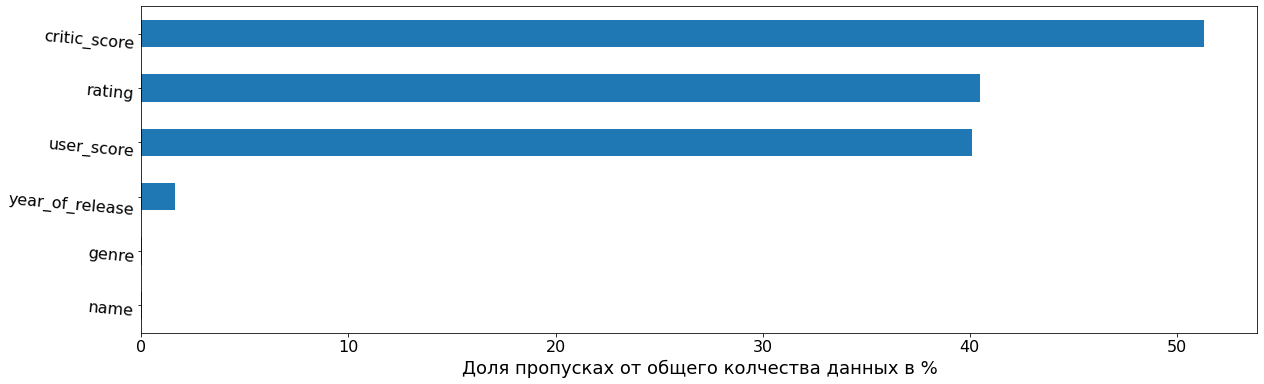

In [ ]:
pass_value_barh(df)

##### Столбец name

In [ ]:
# Проверим пропуск
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


*О данной игре слишком мало данных, её можно удалить, это не повлияет на ход исследований.*

In [ ]:
# Удаляем строку с пропуском
df = df.dropna(subset = ['name'])

##### Столбец year_of_release

In [ ]:
# Посчитаем процент пропусков в данном столбце от общего количества данных
df['year_of_release'].isna().mean()*100

1.6096218286261368

*Пропусков в данном столбце всего 1.6% от общего количества пропусков. Т.к. данные заполнить нечем, стоит удалить данные строки.*

In [ ]:
df = df.dropna(subset = ['year_of_release'])

##### Столбец genre

In [ ]:
# Проверим пропуск
df[df.genre.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


*Пропусков нет, т.к. мы уже удалили строку с пропуском, проверяя пропуски в столбце **name**.*

##### Столбец critic_score

In [ ]:
# Посчитаем процент пропусков в данном столбце от общего количества данных
df['critic_score'].isna().mean()*100

51.45654685884571

*Пропуски связаны, скорее всего, с тем, что для игры не собиралась оценка критиков. Пропусков в данном столбце больше 51%, удаление такого количества данных некорректно, как и замена значений на среднее и медианное. Заполним эти пропуски отрицательной оценкой, чтобы данные не мешали исследованию.*

In [ ]:
# Заменим пропуски на отрицательную оценку максимального значения
df['critic_score'] = df['critic_score'].fillna(-100)

##### Столбец user_score

In [ ]:
# Посчитаем процент пропусков в данном столбце от общего количества данных
df['user_score'].isna().mean()*100

40.16906890470109

*Пропуски связаны, скорее всего, с тем, что для игры не собиралась оценка пользователей. Пропусков в данном столбце больше 40%, удаление такого количества данных некорректно, как и замена значений на среднее и медианное. Заполним эти пропуски отрицательной оценкой, чтобы данные не мешали исследованию.*

In [ ]:
# Заменим пропуски на отрицательную оценку максимального значения
df['user_score'] = df['user_score'].fillna(-10)

In [ ]:
# Проверим значения в столбце на наличие некорректных значений
df['user_score'].unique()

array(['8', -10, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*В данном столбце видим такое значение, как **tbd**. Согласно поиску это аббревиатура от **To Be Determined**, в буквальном переводе означает **"Будет определено"**. Иначе говоря, оценка игры до сих пор не определена. Так же заполним эти значения отрицательной оценкой, чтобы данные не мешали исследованию.*

In [ ]:
# Заменим tbd на отрицательную оценку максимального значения
df.loc[df['user_score'] == 'tbd', 'user_score'] = -10

##### Столбец rating

In [ ]:
# Посчитаем процент пропусков в данном столбце от общего количества данных
df['rating'].isna().mean()*100

40.60086358936933

In [ ]:
# Посмотрим на уникальные значения этого столбца
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

*Пропуски связаны, скорее всего, с тем, что игре не присвоен рейтинг согласно системе от ESRB. Пропусков в данном столбце больше 40%, удаление такого количества данных некорректно, как и замена значений на среднее и медианное. Заполним эти пропуски значением **unknown**, чтобы данные не мешали исследованию.*

In [ ]:
# Заменим пропуск на unknowm
df['rating'] = df['rating'].fillna('unknown')

##### Итоговая проверка пропусков

In [ ]:
# Ещё раз проверяем пропуски
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [ ]:
# Посчитаем общий процент оставшихся данных
print('После обработки пропусков осталось', (len(df['name']) / 16715 * 100), '% данных')

После обработки пропусков осталось 98.37271911456776 % данных


*Пропусков не осталось. Данных осталось **более 98%**.*

#### Типы данных

In [ ]:
# Изменяем тип данных выбранных столбцов
df['year_of_release'] = (df['year_of_release']).astype('int')
df['user_score'] = (df['user_score']).astype('float')

In [ ]:
# Проверим типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


####  Столбец с общей продажей

In [ ]:
# Создадим столбец total_sales и заполним его суммой продаж по всем регионам
df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [ ]:
# Проверим получившийся набор данных
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-100.0,-10.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-100.0,-10.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-100.0,-10.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-100.0,-10.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-100.0,-10.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-100.0,-10.0,unknown,0.01


#### Выводы по предобработке данных

В ходе предобработки данных было сделано:
* Все столбцы успешно приведены в единый стиль;
* Все дубликаты найдены и успешно обработаны;
* Все пропуски обработаны:
  * **name** - пропуски удалены в виду малого количества и значимости;
  * **year_of_release** - пропуски удалены в виду малого количества и значимости;
  * **genre** - пропуски удалены в виду малого количества и значимости;
  * **critic_score** - пропуски заменены на значение **-100**;
  * **user_score** - пропуски заменены на значение **-10**;
  * **rating** - пропуски заменены на значение **unknown**.
* Типы данных изменены:
  * **Year_of_Release**(float64 - int);
  * **User_Score**(object - float64).
* Создан столбец **total_sales** с общей суммой продаж.

В ходе предобработки данных было **потеряно менее 2% данных**, предобработку можно считать **успешной**.

### Исследовательский анализ данных

#### Количество выпущенных игр в разные годы

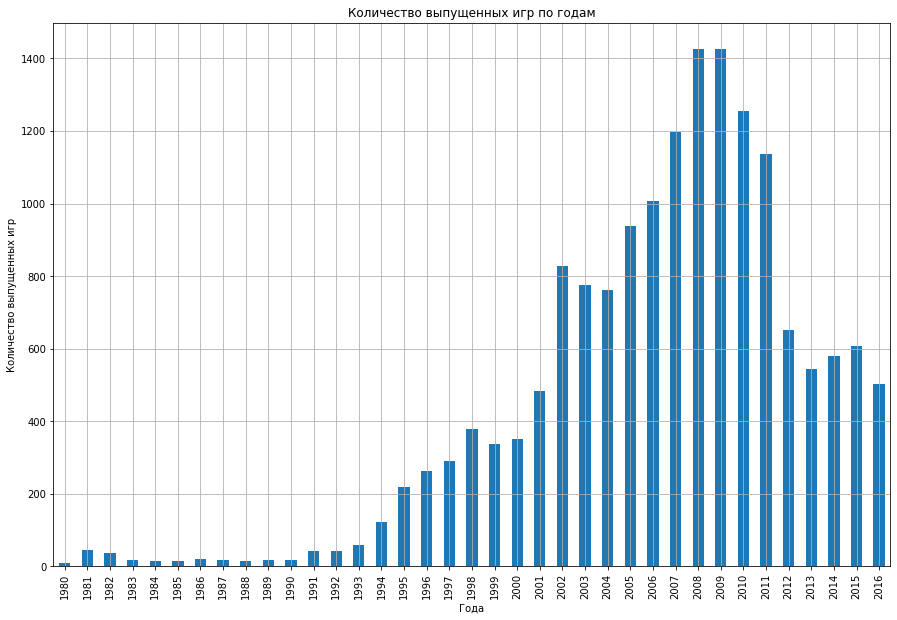

In [ ]:
# Построим график с количеством выпущенных игр в каждом году
(df
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar' , grid=True, figsize=(15, 10), legend = False)
)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Года')
plt.ylabel('Количество выпущенных игр')
plt.show()

**Выводы:**
* Игры выпускались с 1980 года;
* С 1980 по 2000 года выпускалось мало игр;
* С 2002 по 2011 года заметен резкий прирост в выпуске игр;
* С 2012 года количество выпущенных игр стабилизируется и не сильно различается;
* Актуальными можно назвать последние 10 лет выпуска игр, т.к. за это время выпускалось больше всего игр.

#### Продажи по платформам

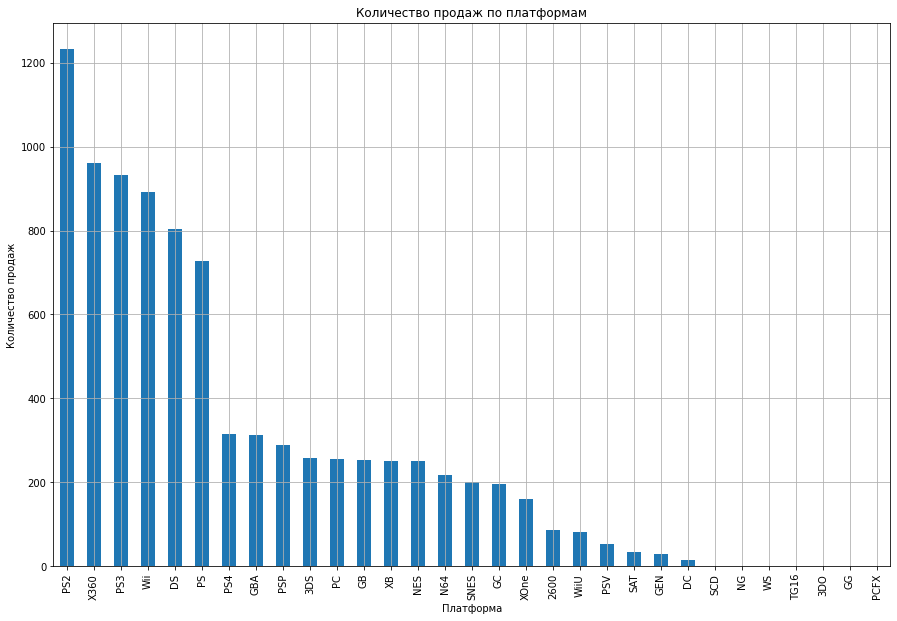

In [ ]:
# Построим график с количеством проданных игр на каждой платформе
(df.
    pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(15, 10), legend = False)
)
plt.title('Количество продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

*Больше всего продаж замечено по 6 платформам, именно по ним и составим графики актуальности платформ по годам.*

In [ ]:
# Созададим список актуальных платформ
top6_platform = (df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                 .sort_values(by='total_sales', ascending=False)
                 .reset_index().head(6)['platform'].tolist()
                )

In [ ]:
# Проверим получившийся список
top6_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Платформа: PS2


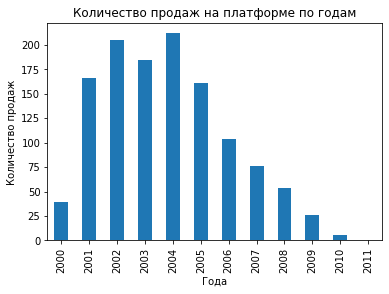

Платформа: X360


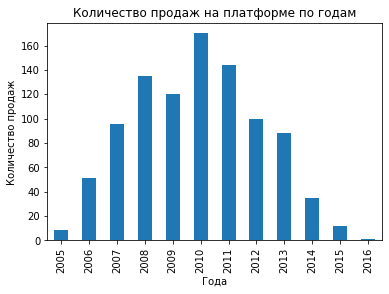

Платформа: PS3


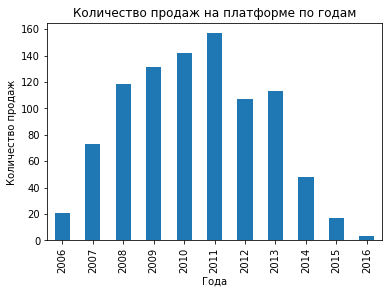

Платформа: Wii


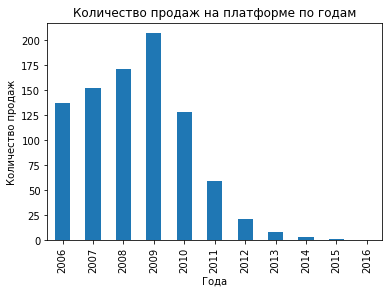

Платформа: DS


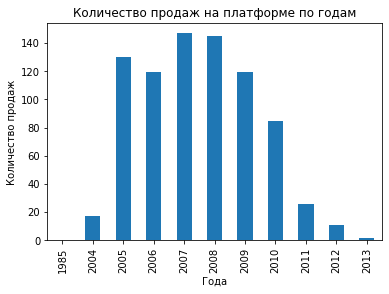

Платформа: PS


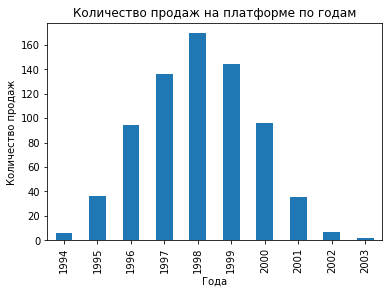

In [ ]:
# Через цикл создадим графики платформ с продажами по годам
for platform in top6_platform:
    print('Платформа:', platform)
    (df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', legend = False)
    )
    plt.title('Количество продаж на платформе по годам')
    plt.xlabel('Года')
    plt.ylabel('Количество продаж')
    plt.show()

In [ ]:
# Проверим выброс у платформы DS
df.query('platform == "DS" and year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-100.0,-10.0,unknown,0.02


*Выброс у платформы DS имеет всего одну строку. Это явная ошибка, т.к. платформа DS выпущена в 2004 году, а игра выпущена якобы в 1985 году. Удалим её.*

In [ ]:
# Удаляем выброс по уже найденному ранее индексу выброса
df = df.drop(index = 15957)

**Выводы:**
* Самая популярная платформа **PS2**, продажи игр по ней превышают 1200миллионов;
* Топ-6 составляют платформы:
  * **PS2** - пик продаж с 2001 по 2006 года;
  * **X360** - пик продаж с 2007 по 2013 года;
  * **PS3** - пик продаж с 2007 по 2013 года;
  * **WII** - пик продаж с 2006 по 2010 года;
  * **DS** - пик продаж с 2005 по 2013 года;
  * **PS** - пик продаж с 1996 по 2000 года.
* Конкуренция платформ:
  * **PS** - не имела серьезных конкурентов;
  * **PS2** - не имела серьезных конкурентов;
  * **WII** и **DS** были явными конкурентами;
  * **X360** и **PS3** были явными конкурентами.
* В среднем популярность платформ проходит в течение 6 лет, после этого популярность платформы падает, скорее всего связано с тем, что появляется новая более продвинутая платформа;
* Согласно топ-6 платформ ни одна из популярных платформ уже не актуальна.

#### Актуальный период

*Актуальным периодом будет считать последние **3 года**, т.к. за это время небыло резкого роста и спада продаж, продажи игр проходили относительно стабильно, а так же будет видно наиболее популярные платформы на данный момент.*

In [ ]:
# Создадим новый набор данных с данными об играх за последние 3 года
actual = df.query('year_of_release >= 2014').copy()

In [ ]:
# Проверим новый набор данных
actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-100.0,-10.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-100.0,-10.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-100.0,-10.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-100.0,-10.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-100.0,-10.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-100.0,-10.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-100.0,-10.0,unknown,0.01


#### Потенциально прибыльные платформы

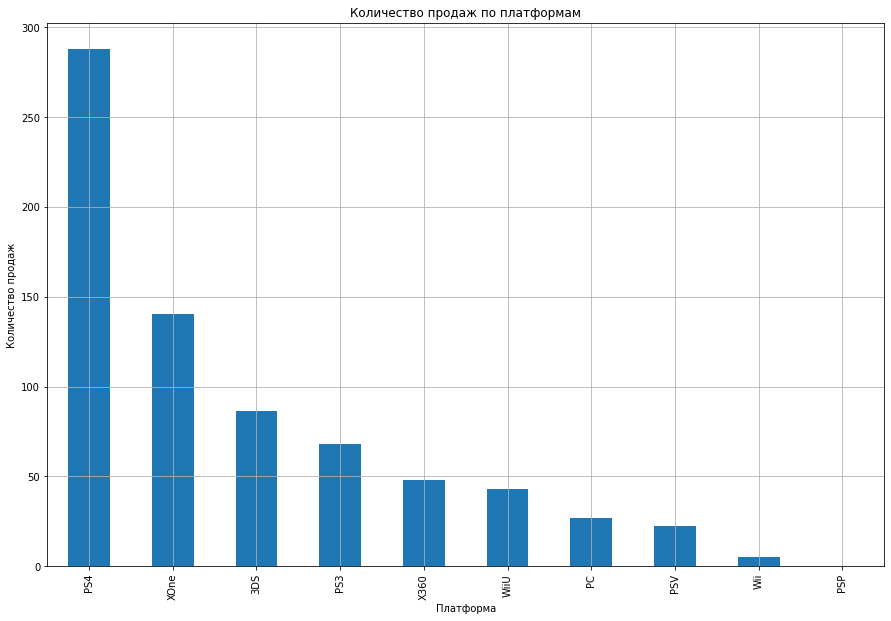

In [ ]:
# Посмотрим на график актуальным платформ на актуальный период
(actual
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(15, 10), legend = False)
)
plt.title('Количество продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

*На актуальный период заметно 5 наиболее популярных платформ.*

In [ ]:
# Создадим список популярных платформ на актуальный период
actual_top_platform = (actual
                       .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                       .sort_values(by='total_sales', ascending=False).reset_index().head(5)['platform']
                       .tolist())

In [ ]:
# Проверим получившийся список
actual_top_platform

['PS4', 'XOne', '3DS', 'PS3', 'X360']

Платформа: PS4


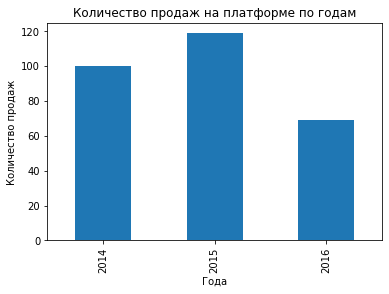

Платформа: XOne


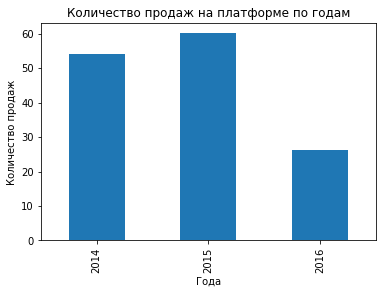

Платформа: 3DS


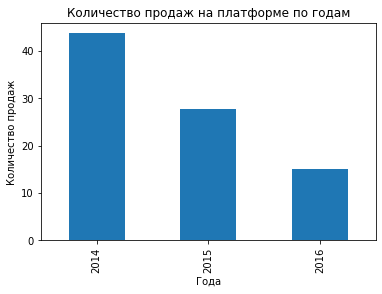

Платформа: PS3


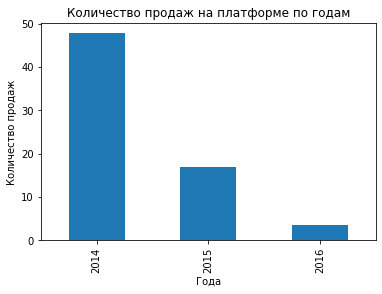

Платформа: X360


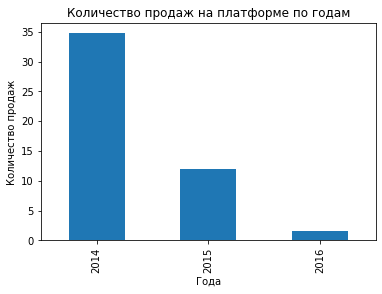

In [ ]:
# Через цикл создадим графики платформ с продажами по годам
for platform in actual_top_platform:
    print('Платформа:', platform)
    (actual
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', legend = False)
    )
    plt.title('Количество продаж на платформе по годам')
    plt.xlabel('Года')
    plt.ylabel('Количество продаж')
    plt.show()

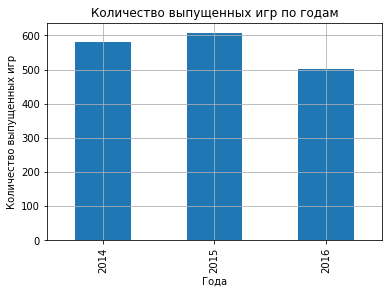

In [ ]:
# Построим график с количеством выпущенных игр в каждом году
(actual
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar' , grid=True, legend = False)
)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Года')
plt.ylabel('Количество выпущенных игр')
plt.show()

**Выводы:**
* За последние 3 года самые популярные платформы:
  * **PS4** - новая платформа, набирает популярность;
  * **PS3** - старая платформа, теряет популярность;
  * **X360** - старая платформа, теряет популярность;
  * **3DS** - старая платформа, но всё ещё актуальна;
  * **XOne** - новая платформа, набирает популярность.
* У всех платформ замечен небольшой спад продаж в 2016, скорее всего связано с неполнотой данных за 2016 год.

#### Boxplot по глобальным продажам платформ за актуальный период

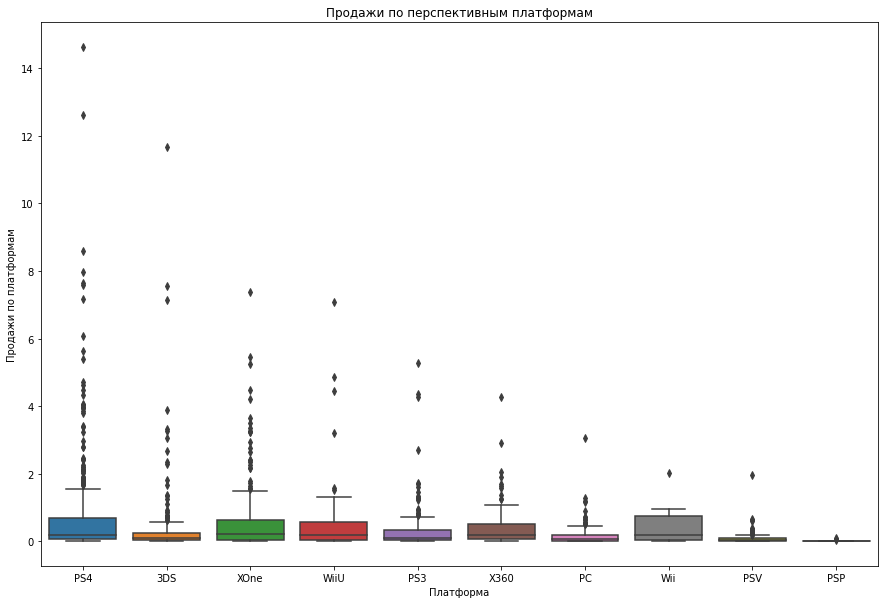

In [ ]:
# Построим boxplot по глобальным продажам каждой платформы
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=actual, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам');

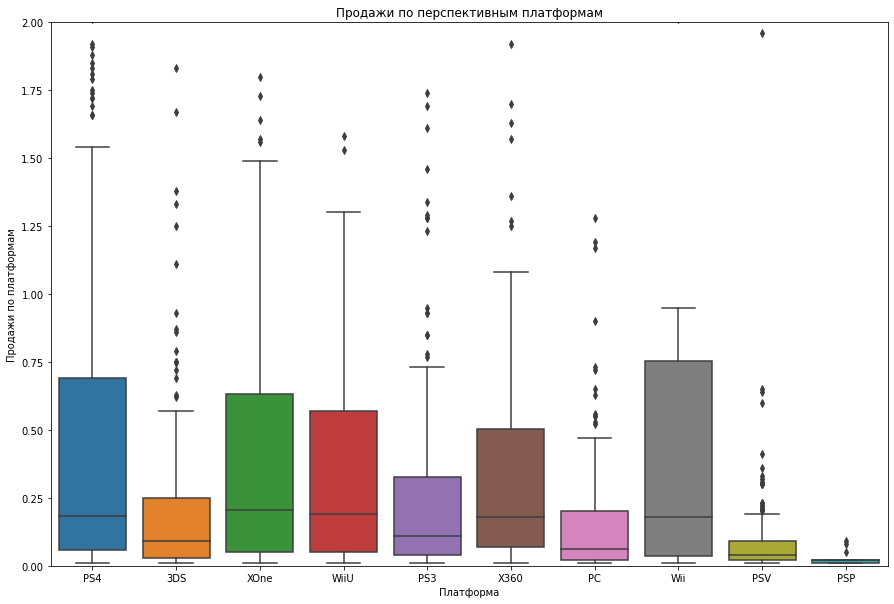

In [ ]:
# Построим такой же boxplot, изменив масштаб для наглядности
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=actual, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам');

**Выводы:**
* Распределение продаж среди платформ относительное одинаково;
* Медиана продаж среди платформ в среднем около 0,2 миллионов;
* По первому и третьему квартилю можно заметить достаточно большой разброс;
* Практически у всех платформ имеются выбросы.

#### Влияние отзывов на продажи на популярной платформе

*За самую популярную примем **PS4**, т.к. платформа всё ещё набирает популярность, а продаж игр за актуальный период по ней больше всего.*

In [ ]:
# Создадим новый набор данных с данными по платформе PS4
PS4 = actual.query('platform == "PS4"')

In [ ]:
# Проверим новый набор данных
PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-100.0,-10.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-100.0,-10.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-100.0,-10.0,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


##### Влияние оценки критиков на продажи

In [ ]:
# Добавим отдельный набор данных без пропусков в оценках критиков
PS4_score = PS4.query('critic_score != -100')

In [ ]:
# Посмотрим корреляцию оценки критиков на продажи
PS4_score['critic_score'].corr(PS4_score['total_sales'])

0.40266141068104083

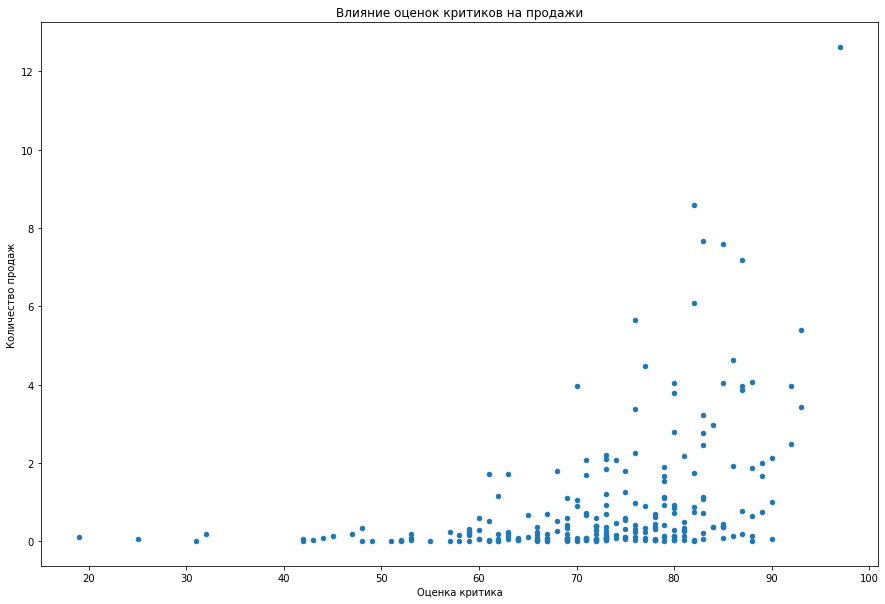

In [ ]:
# Построим диаграмму рассеивания влияния оценкок критиков на продажи
PS4_score.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize = (15,10))
plt.title('Влияние оценок критиков на продажи')
plt.xlabel('Оценка критика')
plt.ylabel('Количество продаж')
plt.show()

*Корреляция составляет 40%, что указывает на слабое влияние оценок критиков, график так же подтверждает на слабое прямое влияние оценок критиков на продажи игр, т.к. большинство игр имеют малое количество продаж не смотря на высокую оценку критиков.*

##### Влияние оценки пользователей на продажи

In [ ]:
# Добавим отдельный набор данных без пропусков в оценках пользователей
PS4_score = PS4.query('user_score != -10')

In [ ]:
# Посмотрим корреляцию оценки критиков на продажи
PS4_score['user_score'].corr(PS4_score['total_sales'])

-0.040131589472697356

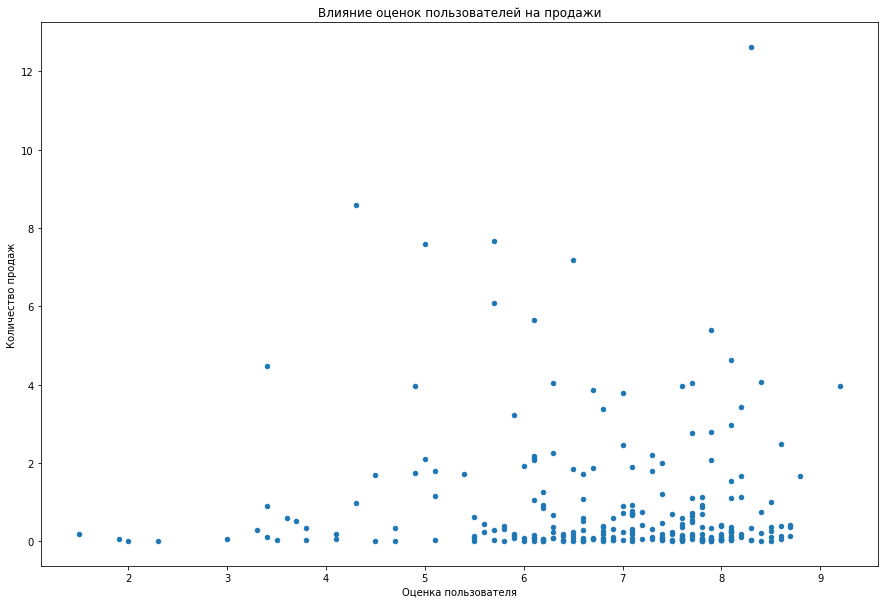

In [ ]:
# Построим диаграмму рассеивания влияния оценкок пользователей на продажи
PS4_score.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize = (15,10))
plt.title('Влияние оценок пользователей на продажи')
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество продаж')
plt.show()

*Линейная корреляция влияния оценок пользователей на продажи отсутствует, график так же подтверждает отсутствие влияния оценок пользователей на продажи игр, т.к. большинство игр имеют малое количество продаж не смотря на высокую оценку пользователей.*

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

##### Влияние оценок на PS3

In [ ]:
# Добавим отдельный набор данных без пропусков в оценках критиков для платформы PS3
PS3_score = actual.query('platform == "PS3" & critic_score != -100')

In [ ]:
# Посмотри на корреляции влияния оценок критиков на продажи по платформе PS3
PS3_score['critic_score'].corr(PS3_score['total_sales'])

0.44657460493190704

In [ ]:
# Добавим отдельный набор данных без пропусков в оценках пользователей для платформы PS3
PS3_score = actual.query('platform == "PS3" & user_score != -10')

In [ ]:
# Посмотри на корреляции влияния оценок пользователей на продажи по платформе PS3
PS3_score['user_score'].corr(PS3_score['total_sales'])

-0.16676141347662118

##### Влияние оценок на PS3

In [ ]:
# Добавим отдельный набор данных без пропусков в оценках критиков для платформы XOne
XOne_score = actual.query('platform == "XOne" & critic_score != -100')

In [ ]:
# Посмотри на корреляции влияния оценок критиков на продажи по платформе XOne
XOne_score['critic_score'].corr(XOne_score['total_sales'])

0.42867694370333226

In [ ]:
# Добавим отдельный набор данных без пропусков в оценках пользователей для платформы XOne
XOne_score = actual.query('platform == "XOne" & user_score != -10')

In [ ]:
# Посмотри на корреляции влияния оценок пользователей на продажи по платформе XOne
XOne_score['user_score'].corr(XOne_score['total_sales'])

-0.0703839280647581

##### Выводы по влиянию оценок на продажи

* Влияние оценок на платформе PS4:
  * **Оценки критиков имеют умеренное влияние** на продажи, большинство игр всё равно имеют малое количество продаж, не смотря на высокую оценку критиков;
  * **Оценки пользователей не имеют влияния** на продажи, большинство игр всё равно имеют малое количество продаж, не смотря на высокую оценку критиков.
* Влияние оценок на платформе PS3:
  * **Оценки критиков имеют умеренное влияние** на продажи, большинство игр всё равно имеют малое количество продаж, не смотря на высокую оценку критиков;
  * **Оценки пользователей имеют слабое обратное влияние** на продажи, большинство игр всё равно имеют малое количество продаж, не смотря на высокую оценку критиков.
* Влияние оценок на платформе XOne:
  * **Оценки критиков имеют умеренное влияние** на продажи, большинство игр всё равно имеют малое количество продаж, не смотря на высокую оценку критиков;
  * **Оценки пользователей не имеют влияния** на продажи, большинство игр всё равно имеют малое количество продаж, не смотря на высокую оценку критиков.
* Оценки критиков на PS4 имеют такое же умеренное влияние на продажи, как и оценки критиков на других платформах;
* Оценки пользователец на PS4 не имеют влияние на продажи, как и на XOne(актуальная конкурирующая платформа), хотя на платформе PS3(устаревшая платформа этого же производителя) можно заметить слабое влияние.

#### Потенциально прибыльные жанры игр

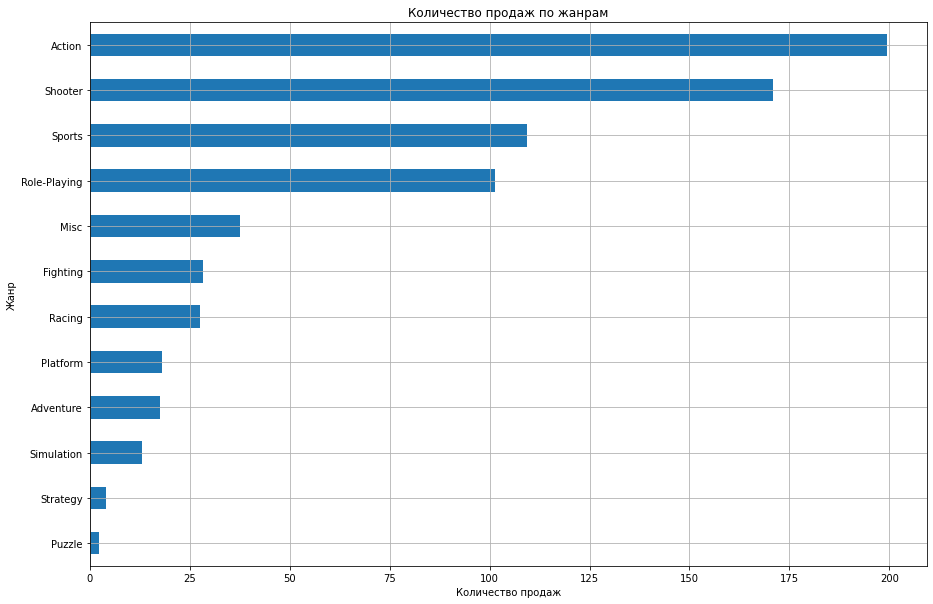

In [ ]:
# Посмотрим на график прибыльных жанров игр на актуальный период
(actual
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    .plot(kind='barh' , grid=True, figsize=(15, 10), legend = False)
)
plt.title('Количество продаж по жанрам')
plt.xlabel('Количество продаж')
plt.ylabel('Жанр')
plt.show()

In [ ]:
# Посмотрим на сводную таблицу продаж по жанрам
(actual.pivot_table(index='genre', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False))

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


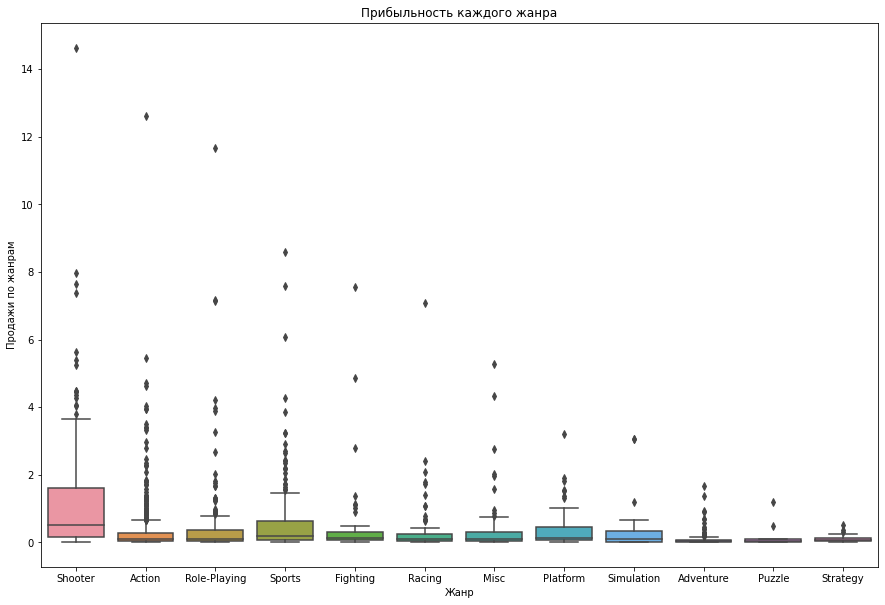

In [ ]:
# Построим boxplot прибыльности каждого жанра
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=actual, x='genre', y='total_sales')
plt.title('Прибыльность каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи по жанрам');

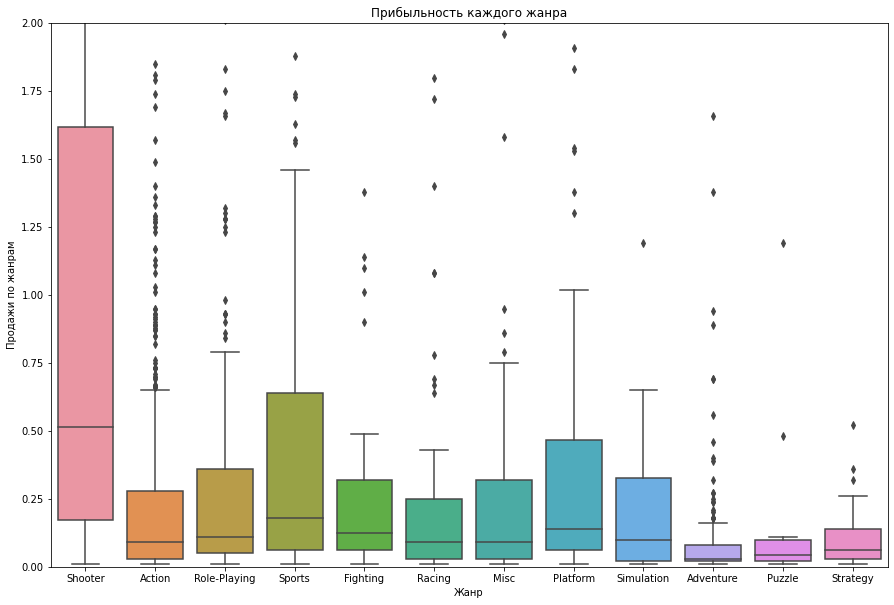

In [ ]:
# Построим этот же boxplot с увеличенным масштабом
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=actual, x='genre', y='total_sales')
ax.set(ylim=(0,2))
plt.title('Прибыльность каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи по жанрам');

In [ ]:
(actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
.sort_values(by='total_sales', ascending=False))

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


**Выводы:**
* **Самые популярный жанр - Action** и **Shooter**;
* Ещё чуть менее популярны **Role_playing** и **Sports**;
* **Самый не продаваемый жанр -  Puzzle**;
* **Самый прибыльный жанр - Shooter**, его медианные значения продаж почти в 3 раза выше предыдущего жанра **Sports**, а значит данный жанр самый стабильный и имеет более длинный ряд успешно продающихся игр.

#### Выводы по анализу данных

* Игры выпускались с 1980 года;
* С 2002 по 2011 года заметен резкий прирост в выпуске игр;
* Топ-6 платформ за всё время:
  * **PS2** - пик продаж с 2001 по 2006 года;
  * **X360** - пик продаж с 2007 по 2013 года;
  * **PS3** - пик продаж с 2007 по 2013 года;
  * **WII** - пик продаж с 2006 по 2010 года;
  * **DS** - пик продаж с 2005 по 2013 года;
  * **PS** - пик продаж с 1996 по 2000 года.
* Ни одна из самых популярных платформ не актуальная в настоящее время;
* Актуальный период принято считать последние 3 года;
* Топ-5 платформ за актуальный период:
  * **PS4** - новая платформа, набирает популярность;
  * **PS3** - старая платформа, теряет популярность;
  * **X360** - старая платформа, теряет популярность;
  * **3DS** - старая платформа, теряет популярность;
  * **XOne** - новая платформа, набирает популярность.
* Оценки критиков имеют умеренное влияние на продажи игр на всех платформах;
* Оценки пользователей не имеют влияния на продажи игр на актуальных на данный момент платформах;
* Топ-4 самых популярных жанров на актуальный период:
  * **Action**;
  * **Shooter**;
  * **Role_playing**;
  * **Sports**.
* **Самый прибыльный жанр - Shooter**, имеет самый длинный ряд успешно продающихся игр;
* Самый непопулярный жанр - **Puzzle**.

### Портрет пользователя по разным регионам

#### Топ-5 платформ в каждом регионе

In [ ]:
# Создадим таблицу топ-5 популярных платформ в регионе NA с количеством продаж в регионе
na_top = (actual
        .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na_top.loc[5:,'platform'] = 'Other' # и определим остальные платформы в общую категорию other
na_top.loc[5,'na_sales'] =  na_top.loc[5:,'na_sales'].sum().round(2)
na_top = na_top.iloc[0:6, :]
na_top.rename(columns = {'platform':'na_top_platform'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
na_top

,na_top_platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,Other,31.19


In [ ]:
# Создадим таблицу топ-5 популярных платформ в регионе EU с количеством продаж в регионе
eu_top = (actual
        .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu_top.loc[5:,'platform'] = 'Other' # и определим остальные платформы в общую категорию other
eu_top.loc[5,'eu_sales'] =  eu_top.loc[5:,'eu_sales'].sum().round(2)
eu_top = eu_top.iloc[0:6, :]
eu_top.rename(columns = {'platform':'eu_top_platform'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
eu_top

,eu_top_platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,Other,34.76


In [ ]:
# Создадим таблицу топ-5 популярных платформ в регионе JP с количеством продаж в регионе
jp_top = (actual
        .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp_top.loc[5:,'platform'] = 'Other' # и определим остальные платформы в общую категорию other
jp_top.loc[5,'jp_sales'] =  jp_top.loc[5:,'jp_sales'].sum().round(2)
jp_top = jp_top.iloc[0:6, :]
jp_top.rename(columns = {'platform':'jp_top_platform'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
jp_top

,jp_top_platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Other,0.76


In [ ]:
# Создадим таблицу топ-5 популярных платформ в регионе JP с количеством продаж в регионе
other_top = (actual
        .pivot_table(index=['platform'], values=['other_sales'], aggfunc='sum')
        .sort_values('other_sales', ascending=False).reset_index()
     )
other_top.loc[5:,'platform'] = 'Other' # и определим остальные платформы в общую категорию other
other_top.loc[5,'other_sales'] =  other_top.loc[5:,'other_sales'].sum().round(2)
other_top = other_top.iloc[0:6, :]
other_top.rename(columns = {'platform':'other_top_platform'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
other_top

,other_top_platform,other_sales
0,PS4,44.48
1,XOne,12.52
2,PS3,9.37
3,X360,4.35
4,3DS,3.68
5,Other,7.22


In [ ]:
# Объединим таблицы в одну
common_top = pd.merge(na_top, eu_top, left_index=True, right_index=True)
common_top = pd.merge(common_top, jp_top, left_index=True, right_index=True)
common_top = pd.merge(common_top, other_top, left_index=True, right_index=True)

In [ ]:
# Проверим получившуюся таблицу
common_top

,na_top_platform,na_sales,eu_top_platform,eu_sales,jp_top_platform,jp_sales,other_top_platform,other_sales
0,PS4,98.61,PS4,130.04,3DS,44.24,PS4,44.48
1,XOne,81.27,XOne,46.25,PS4,15.02,XOne,12.52
2,X360,28.30,PS3,25.54,PSV,14.54,PS3,9.37
3,3DS,22.64,PC,17.97,PS3,11.22,X360,4.35
4,PS3,22.05,3DS,16.12,WiiU,7.31,3DS,3.68
5,Other,31.19,Other,34.76,Other,0.76,Other,7.22


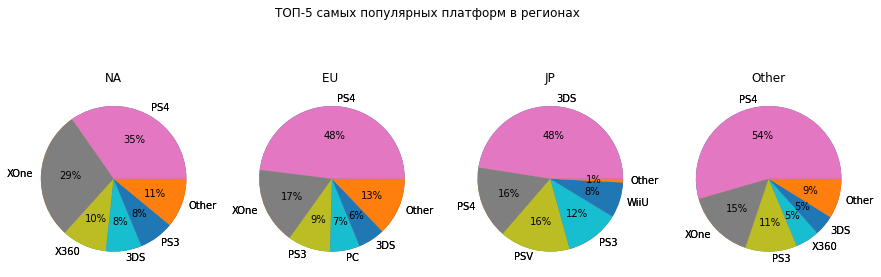

In [ ]:
# Создадим вспомогательный словарь регионов
regions = {'region': ['NA', 'EU ', 'JP', 'Other'],
           'platform': ['na_top_platform', 'eu_top_platform', 'jp_top_platform', 'other_top_platform'],
           'sales': ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
          }
regions = pd.DataFrame(regions)


# Построим круговые диаграммы для каждого региона
f, ax = plt.subplots(1, 4, figsize=(15,5))
f.suptitle('ТОП-5 самых популярных платформ в регионах')
for i in regions.index:
    sales = regions['sales'][i]
    platform = regions['platform'][i]
    name = regions['region'][i]
    ax[i].pie(common_top[sales], labels = common_top[platform])
    ax[i].pie(common_top[sales], labels = common_top[platform], autopct='%1.0f%%')
    ax[i].set_title(name)

plt.show()

**Выводы:**
* Самая популярна платформа по регионам:
  * **NA** - **PS4**(35%);
  * **EU** - **PS4**(48%);
  * **JP** - **3DS**(48%).
* Регионы **NA** и **EU** различаются лишь одной популярной платформой(**X360** и **PC** соответственно);
* В регионах **EU** и **JP** самая популярная платформа занимает практически половину всего рынка;
* В регионе **JP** топ-5 самых популярных платформ занимает **99%** всего рынка.

#### Топ-5 жанров в каждом регионе

In [ ]:
# Создадим таблицу топ-5 популярных жанров в регионе NA с количеством продаж в регионе
na_top = (actual
        .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na_top.loc[5:,'genre'] = 'Other' # и определим остальные жанры в общую категорию other
na_top.loc[5,'na_sales'] =  na_top.loc[5:,'na_sales'].sum().round(2)
na_top = na_top.iloc[0:6, :]
na_top.rename(columns = {'genre':'na_top_genre'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
na_top

,na_top_genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Other,37.86


In [ ]:
# Создадим таблицу топ-5 популярных жанров в регионе EU с количеством продаж в регионе
eu_top = (actual
        .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu_top.loc[5:,'genre'] = 'Other' # и определим остальные жанры в общую категорию other
eu_top.loc[5,'eu_sales'] =  eu_top.loc[5:,'eu_sales'].sum().round(2)
eu_top = eu_top.iloc[0:6, :]
eu_top.rename(columns = {'genre':'eu_top_genre'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
eu_top

,eu_top_genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Other,42.45


In [ ]:
# Создадим таблицу топ-5 популярных жанров в регионе JP с количеством продаж в регионе
jp_top = (actual
        .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp_top.loc[5:,'genre'] = 'Other' # и определим остальные жанры в общую категорию other
jp_top.loc[5,'jp_sales'] =  jp_top.loc[5:,'jp_sales'].sum().round(2)
jp_top = jp_top.iloc[0:6, :]
jp_top.rename(columns = {'genre':'jp_top_genre'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
jp_top

,jp_top_genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Other,15.50


In [ ]:
# Объединим таблицы в одну
common_top = pd.merge(na_top, eu_top, left_index=True, right_index=True)
common_top = pd.merge(common_top, jp_top, left_index=True, right_index=True)

In [ ]:
# Проверим получившуюся таблицу
common_top

,na_top_genre,na_sales,eu_top_genre,eu_sales,jp_top_genre,jp_sales
0,Shooter,79.02,Action,74.68,Role-Playing,31.16
1,Action,72.53,Shooter,65.52,Action,29.58
2,Sports,46.13,Sports,45.73,Fighting,6.37
3,Role-Playing,33.47,Role-Playing,28.17,Misc,5.61
4,Misc,15.05,Racing,14.13,Shooter,4.87
5,Other,37.86,Other,42.45,Other,15.50


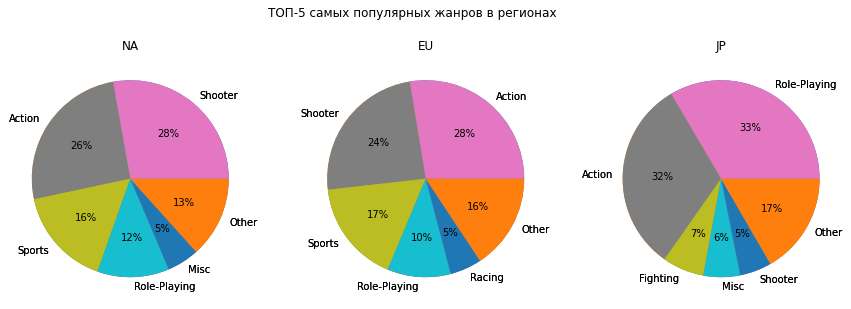

In [ ]:
# Создадим вспомогательный словарь регионов
regions = {'region': ['NA', 'EU', 'JP'],
           'genre': ['na_top_genre', 'eu_top_genre', 'jp_top_genre'],
           'sales': ['na_sales', 'eu_sales', 'jp_sales']}
regions = pd.DataFrame(regions)

# Построим круговые диаграммы для каждого региона
f, ax = plt.subplots(1, 3, figsize=(15,5))
f.suptitle('ТОП-5 самых популярных жанров в регионах')
for i in regions.index:
    sales = regions['sales'][i]
    genre = regions['genre'][i]
    name = regions['region'][i]
    ax[i].pie(common_top[sales], labels = common_top[genre])
    ax[i].pie(common_top[sales], labels = common_top[genre], autopct='%1.0f%%')
    ax[i].set_title(name)

plt.show()

**Выводы:**
* В регионах **NA** и **EU** популярны одни и те же жанры, но с разными долями, за исключением 5 места(**Misc** и **Racing** соответственно);
* Жанр **Action** популярен во всех регионах с большой долей, только в регионе **UE** он занимает 1 место, а не 2;
* Жанр **Role_Playing** популярен во всех регионах, но только в регионе **JP** он занимает лидирующую позицию, в остальных регионах он имеет не большую долю(около 10%);
* Самый популярный жанр по регионам:
  * **NA** - **Shooter**(30%);
  * **EU** - **Action**(31%);
  * **JP** - **Role_Playing**(34%).

#### Влияние рейтинга ESRB на продажи в каждом регионе

In [ ]:
# Создадим таблицу рейтинга ESBR с количеством продаж в регионе NA
na_top = (actual
        .pivot_table(index=['rating'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na_top.rename(columns = {'rating':'na_rating'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
na_top

,na_rating,na_sales
0,M,96.42
1,unknown,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


In [ ]:
# Создадим таблицу рейтинга ESBR с количеством продаж в регионе EU
eu_top = (actual
        .pivot_table(index=['rating'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu_top.rename(columns = {'rating':'eu_rating'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
eu_top

,eu_rating,eu_sales
0,M,93.44
1,unknown,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


In [ ]:
# Создадим таблицу рейтинга ESBR с количеством продаж в регионе JP
jp_top = (actual
        .pivot_table(index=['rating'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )

jp_top.rename(columns = {'rating':'jp_rating'}, inplace = True)

In [ ]:
# Проверим получившуюся таблицу
jp_top

,jp_rating,jp_sales
0,unknown,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


In [ ]:
# Объединим таблицы в одну
common_top = pd.merge(na_top, eu_top, left_index=True, right_index=True)
common_top = pd.merge(common_top, jp_top, left_index=True, right_index=True)

In [ ]:
# Проверим получившуюся таблицу
common_top

,na_rating,na_sales,eu_rating,eu_sales,jp_rating,jp_sales
0,M,96.42,M,93.44,unknown,56.90
1,unknown,64.72,unknown,58.95,T,14.78
2,E,50.74,E,58.06,E,8.94
3,T,38.95,T,34.07,M,8.01
4,E10+,33.23,E10+,26.16,E10+,4.46


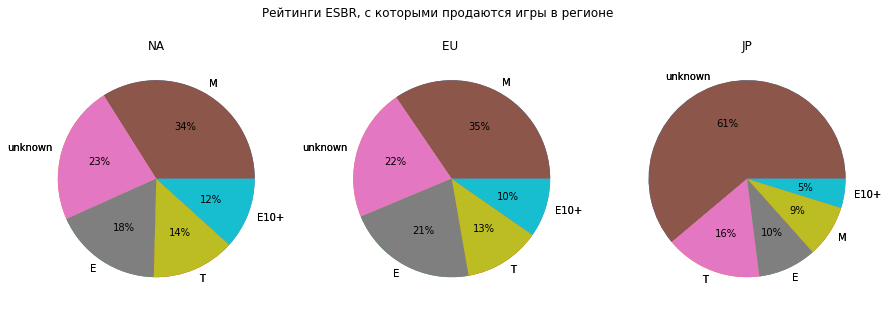

In [ ]:
# Создадим вспомогательный словарь регионов
regions = {'region': ['NA', 'EU ', 'JP'],
           'rating': ['na_rating', 'eu_rating', 'jp_rating'],
           'sales': ['na_sales', 'eu_sales', 'jp_sales']
          }
regions = pd.DataFrame(regions)

# Построим круговые диаграммы для каждого региона
f, ax = plt.subplots(1, 3, figsize=(15,5))
f.suptitle('Рейтинги ESBR, с которыми продаются игры в регионе')
for i in regions.index:
    sales = regions['sales'][i]
    rating = regions['rating'][i]
    name = regions['region'][i]
    ax[i].pie(common_top[sales], labels = common_top[rating])
    ax[i].pie(common_top[sales], labels = common_top[rating], autopct='%1.0f%%')
    ax[i].set_title(name)

plt.show()

Обращаюсь к интернету получаем расшифровку рейтинга:
* **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. С 1 марта 2018 года этот рейтинг больше не используется и заменяется на **«E» («Everyone»)** по причине того, что этот рейтинг имели менее 300 игр;
* **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально **"K-A" ("Kids to Adults")**;
* **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года;
* **«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;
* **«M» («Mature»)** — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику;
* **«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое;
* **«RP» («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу;
* **«RP 17+» («Rating Pending»)** — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант.

**Выводы:**
* В регионах **NA** и **EU** рейтинги имеют равные доли продаж игр с небольшим отклонением(до 3%);
* В регионах **NA** и **EU** большая часть продаж приходится на рейтинг **«M» («Mature»)** — «Для взрослых», чуть меньше продаж игр **без рейтинга**;
* В регионе **JP** абсолютное большинство продаваемых игр не имеют рейтинга ESRB(61%).

#### Выводы по портрету пользователя в каждом регионе

* Портрет пользователя в регионах **NA** практически совпадает с регионом **EU**, за исключением доль популярности платформ и жанров:
  * Самые популярные платформы:
    * **PS4** - самая популярная платформа в обоих регионах;
    * **XOne**;
    * **X360** - 3 место в **NA** / **PS3** - 3 место в **EU**.
  * Самые популярные жанры:
    * **Action** - самый популярный жанр в обоих регионах;
    * **Shooter**;
    * **Sports**.
  * Больше всего проданных игр имеют рейтинг **«M» («Mature»)**(34-35% всех проданных игр).
* Портрет пользователя в регионе **JP** отличается от двух других регионов:
  * Самые популярные платформы:
    * **3DS** - самая популярная платформа в регионе, не смотря на то, что её можно считать устаревшей;
    * **PS4**;
    * **PSV**.
  * Самые популярные жанры:
    * **Role_Playing** - самый популярный жанр в регионе, не смотря на не самую высокую популярность в других регионах;
    * **Action**;
    * **Fighting**.
  * Абсолютное большинство продаваемых игр не имеет рейтинга.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

Определяем нулевую(H0) и альтернативную(H1) гипотезы:
* **H0:** Средние пользовательские рейтинги платформ **Xbox One** и **PC** равны;
* **H1:** Средние пользовательские рейтинги платформ **Xbox One** и **PC** не равны.

In [ ]:
# Проверим описательную статистику оценки пользователей по Xbox One
xone = actual.query('platform == "XOne" and user_score != -10')
xone['user_score'].describe().T

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [ ]:
# Проверим описательную статистику оценки пользователей по PC
pc = actual.query('platform == "PC" and user_score != -10')
pc['user_score'].describe().T

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

*По описательной статистике видим, что размеры выборок не равны, а значит у них скорее всего разные дисперсии. Примем уровень статистической значимости равно .05.*

In [ ]:
# Примем уровень статистической значимости равно .05
alpha = 0.05

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False) # Добавим параметр для разных дисперсий


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


*Отвергнуть нулевую гипотезу не получилось, значит средняя оценка пользователей на платформе **Xbox One равна** платформе **PC**.*

In [ ]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action и Sports разные?

Обратим гипотизу наизнанку для удобства проверки гипотизы.

Определяем нулевую(H0) и альтернативную(H1) гипотезы:
* **H0:** Средние пользовательские рейтинги жанров **Action** и **Sports** равны;
* **H1:** Средние пользовательские рейтинги жанров **Action** и **Sports** не равны.

In [ ]:
# Проверим описательную статистику оценки пользователей по Action
action = actual.query('genre == "Action" and user_score != -10')
action['user_score'].describe().T

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [ ]:
# Проверим описательную статистику оценки пользователей по Sports
sports = actual.query('genre == "Sports" and user_score != -10')
sports['user_score'].describe().T

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

*По описательной статистике видим, что размеры выборок не равны, а значит у них скорее всего разные дисперсии. Примем уровень статистической значимости равно .05.*

In [ ]:
# Примем уровень статистической значимости равно .05
alpha = 0.05

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    equal_var=False) # Добавим параметр для разных дисперсий


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


*Отвергаем нулевую гипотезу, значит среднии оценки пользователей по жанрам **Action** и **Sports** разные.*  
Т.к. изначально мы обратили гипотезу наизнанку, значит <u>**изначальную гипотезу отвергнуть не получилось**</u>.

### Общий вывод

В ходе работы над проектом:
1. Данные загружены и изучены:
   * В данном наборе данных имеется 11 столбцов и 16715 строк;
   * Названия столбцов нужнаются в исправлении;
   * Пропуски данных замечены в 6 столбцах;
   * Тип данных некоторых столбцов необходимо изменить для удобства исследований.
2. В ходе предобработки данных было сделано:
   * Все столбцы успешно приведены в единый стиль;
   * Все дубликаты найдены и успешно обработаны;
   * Все пропуски обработаны;
   * Типы данных изменены;
   * Создан столбец total_sales с общей суммой продаж.
   * В ходе предобработки данных было **потеряно менее 2% данных, предобработку можно считать успешной**.
3. В ходе статистического анализа данных было выявлено:
   * Игры выпускались с 1980 года;
   * С 2002 по 2011 года заметен резкий прирост в выпуске игр;
   * Топ-6 платформ за всё время:
      * **PS2** - пик продаж с 2001 по 2006 года;
      * **X360** - пик продаж с 2007 по 2013 года;
      * **PS3** - пик продаж с 2007 по 2013 года;
      * **WII** - пик продаж с 2006 по 2010 года;
      * **DS** - пик продаж с 2005 по 2013 года;
      * **PS** - пик продаж с 1996 по 2000 года.
   * Ни одна из самых популярных платформ не актуальная в настоящее время;
   * Актуальный период принято считать **последние 3 года**;
   * Топ-5 платформ за актуальный период:
     * **PS4** - новая платформа, набирает популярность;
     * **PS3** - старая платформа, теряет популярность;
     * **X360** - старая платформа, теряет популярность;
     * **3DS** - старая платформа, теряет популярность;
     * **XOne** - новая платформа, набирает популярность.
   * Оценки критиков имеют умеренное влияние на продажи игр на самой популярной платформе **PS4**;
   * Оценки пользователец на PS4 не имеют влияние на продажи, как и на XOne(актуальная конкурирующая платформа), хотя на платформе PS3(устаревшая платформа этого же производителя) можно заметить слабое влияние;
   * Топ-4 самых популярных жанров на актуальный период:
     * **Action**;
     * **Shooter**;
     * **Role_playing**;
     * **Sports**.
   * Самый стабильный жанр с большим рядом популярных игр - **Shooter**;
   * Самый непопулярный жанр - **Puzzle**.
4. В ходе построения профиля пользователей сделаны выводы:
   * Портрет пользователя в регионах **NA** практически совпадает с регионом **EU**, за исключением доль популярности платформ и жанров:
     * Самые популярные платформы:
       * **PS4** - самая популярная платформа в обоих регионах;
       * **XOne**;
       * **X360** - 3 место в **NA** / **PS3** - 3 место в **EU**. Уже устаревшие платформы и вскоре окончательно утратят популярность.
     * Самые популярные жанры:
       * **Action** - самый популярный жанр в обоих регионах;
       * **Shooter**;
       * **Sports**.
     * Больше всего проданных игр имеют рейтинг **«M» («Mature»)**(34-35% всех проданных игр).
   * Портрет пользователя в регионе **JP** отличается от двух других регионов:
     * Самые популярные платформы:
       * **3DS** - самая популярная платформа в регионе, не смотря на то, что её можно считать устаревшей;
       * **PS4**;
       * **PSV**.
     * Самые популярные жанры:
       * **Role_Playing** - самый популярный жанр в регионе, не смотря на не самую высокую популярность в других регионах;
       * **Action**;
       * **Fighting**.
     * Абсолютное большинство продаваемых игр не имеет рейтинга.
5. В ходе проверки гипотез было решено:
   * Cредняя оценка пользователей на платформе **Xbox One равна** платформе **PC**;
   * Cреднии оценки пользователей по жанрам **Action** и **Sports** разные.

**Рекомендации по кампании интернет-магазина "Стримчик" на 2017й год:**
* В регионах **NA** и **EU** стоит проводить увеличенную закупку и акцентировать рекламу:
  * По платформам:
    * <u>**PS4**</u>;
    * **XOne**.
  * По жанрам:
    * <u>**Action**</u>;
    * **Shooter**;
    * **Sports**.
  * По играм с рейтингами:
    * <u>**«M» («Mature»)**</u>;
    * **Не имеющим рейтинга**.
* В регионе **JP** стоит проводить увеличенную закупку и акцентировать рекламу:
  * По платформам:
    * <u>**3DS**</u>;
    * **PS4**;
    * **PSV**.
  * По жанрам:
    * <u>**Role_Playing**</u>;
    * **Action**;
    * **Fighting**.
  * По играм с рейтингами:
    * <u>*Не имеющим рейтинга*</u>;
    * **«T» («Teen»)**.
